<a href="https://colab.research.google.com/github/inputJun/MachineLearning-Study/blob/main/2022%EB%85%841%ED%95%99%EA%B8%B0%EB%93%9C%EB%A1%A0%EA%B3%BC%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC_201700846%EA%B3%A0%EC%A4%80%ED%99%98_LinearResgression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**201700846 고준환**

**회전익 기체 제원 데이터 받아오기**
- MultiCopter.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
Drone_multi = pd.read_csv("MultiCopter.csv")
Drone_multi.head()

,Company,Name,Length,Width,Height,Weight
0,DJI,MAVIC 2 ZOOM,322.0,242.0,84.0,905
1,DJI,MAVIC 2 PRO,322.0,242.0,84.0,907
2,DJI,PHANTOM 4 PRO,289.5,289.5,196.0,1375
3,DJI,SPARK,143.0,143.0,55.0,300
4,DJI,INSPIRE 2,427.0,317.0,425.0,3440


In [ ]:
Drone_multi.columns

Index(['Company', 'Name', 'Length', 'Width', 'Height', 'Weight'], dtype='object')

**csv 파일에서 회전익의 전장(Length), 무게(Weight)값을 추출한 후 리스트 생성**

회전익의 전장

In [ ]:
multi_length_list = []
for i in Drone_multi["Length"] :
  multi_length_list.append(i)
print(multi_length_list)

[322.0, 322.0, 289.5, 143.0, 427.0, 1460.0, 400.0, 1940.0, 1860.0, 365.0, 1974.0, 1590.0, 730.0, 1002.0, 204.0, 305.0, 159.0, 1800.0, 860.0, 1140.0, 1225.0, 350.0, 1000.0, 1100.0, 643.0, 535.0, 330.0, 1000.0, 360.0, 2123.0]


회전익의 무게

In [ ]:
multi_weight_list = []
for i in Drone_multi["Weight"] :
  multi_weight_list.append(i)
print(multi_weight_list)

[905, 907, 1375, 300, 3440, 9700, 147, 14900, 17100, 992, 18320, 18500, 1434, 5500, 790, 945, 249, 13800, 9700, 9400, 15000, 1400, 13100, 13500, 5250, 7600, 1200, 10200, 850, 18800]


**넘파이 배열로 전환**

In [ ]:
multi_length = np.array(multi_length_list)
multi_weight = np.array(multi_weight_list)

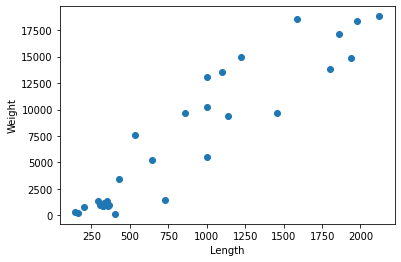

In [ ]:
plt.scatter(multi_length, multi_weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    multi_length, multi_weight, random_state=14)

In [ ]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

**선형 회귀**

모델의 계수와 절편 출력

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.coef_, lr.intercept_)

[9.94980977] -1929.3182757776094


**weight** = 9.94980977  x  **length** -1929.3182757776094

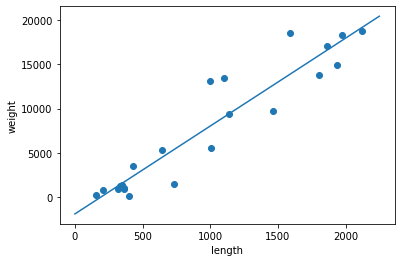

In [ ]:
point = np.arange(0, 2250)
plt.scatter(train_input, train_target)
plt.plot(point, lr.coef_*point + lr.intercept_)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**다항 회귀**

In [ ]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

모델의 계수와 절편 출력

In [ ]:
lr = LinearRegression()
lr.fit(train_poly,train_target)

print(lr.coef_, lr.intercept_)

[-1.30649344e-03  1.28349806e+01] -2938.7208490183702


**weight** = -1.30649344e-03  x  **length**^2 +1.28349806e+01  x  **length**  -2938.7208490183702

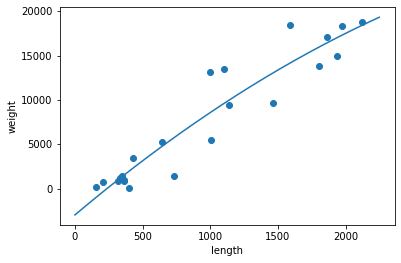

In [ ]:
point = np.arange(0, 2250)
plt.scatter(train_input, train_target)
plt.plot(point, -1.30649344e-03*point**2 + 1.28349806e+01*point + lr.intercept_)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()